# Matplotlib Notes

In [2]:
#%matplotlib inline
import matplotlib.pyplot as plt
import pandas

Text(0, 0.5, 'Position (km)')

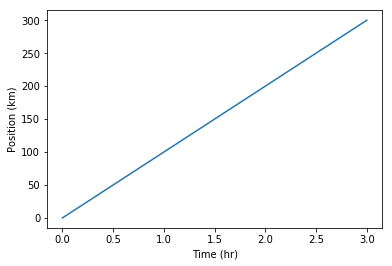

In [4]:
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]

plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')

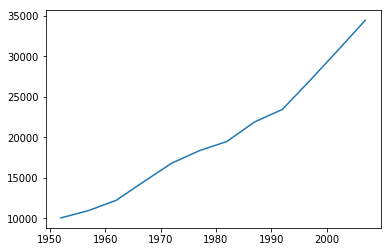

In [3]:
"""Plot data directly from a Pandas dataframe."""

data = pandas.read_csv('data/gapminder_gdp_oceania.csv', index_col='country')

# Extract year from last 4 characters of each column name
years = data.columns.str.strip('gdpPercap_')
# Convert year values to integers, saving results back to dataframe
data.columns = years.astype(int)
# Plot
data.loc['Australia'].plot()

Text(0, 0.5, 'GDP per capita')

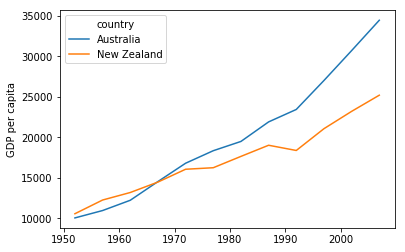

In [6]:
"""Select and transform data, then plot it."""
# Transform data on fly so years are rows and countries columns, and plot
data.T.plot()
plt.ylabel('GDP per capita')

Text(0, 0.5, 'GDP per capita')

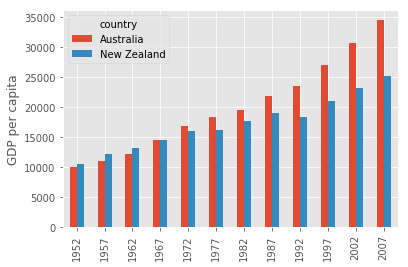

In [10]:
"""Test fancier barplot styles using ggplot"""
plt.style.use('ggplot')
data.T.plot(kind='bar')
plt.ylabel('GDP per capita')

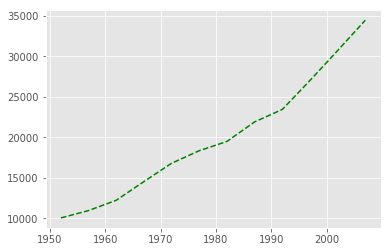

In [11]:
""" Call matplotlib plot function directly"""
# plot Australian GDP over time in years
years = data.columns
gdp_australia = data.loc['Australia']
# g-- specifies a green dashed line, 
plt.plot(years, gdp_australia, 'g--')

Text(0, 0.5, 'GDP per capita ($)')

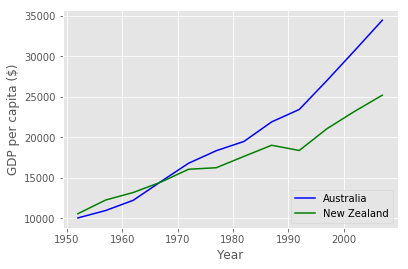

In [17]:
'''Plot multiple datasets together'''
# Select two countries' worth of data.
gdp_australia = data.loc['Australia']
gdp_nz = data.loc['New Zealand']

# Plot with differently-colored markers.
plt.plot(years, gdp_australia, 'b-', label='Australia')
plt.plot(years, gdp_nz, 'g-', label='New Zealand')

# Create legend (uses labels specified earlier)
plt.legend(loc='lower right')
plt.xlabel('Year')
plt.ylabel('GDP per capita ($)')

Text(0, 0.5, 'New ZeaLand')

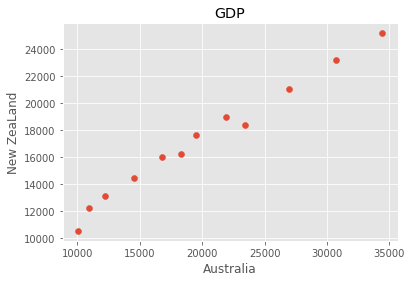

In [23]:
'''Scatter plot correlating the GDP of Australia and New Zealand'''
plt.scatter(gdp_australia, gdp_nz)
plt.title("GDP")
plt.xlabel('Australia')
plt.ylabel('New ZeaLand')


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 8 Text xticklabel objects>)

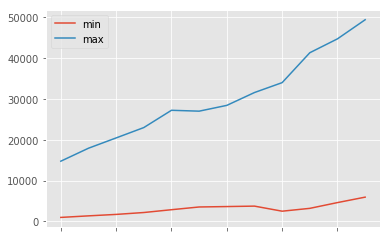

In [31]:
"""Minimum and maximum GDP per capita over time for all the countries in Europe.""" 
data_europe = pandas.read_csv('data/gapminder_gdp_europe.csv', index_col='country')
# Minimum
data_europe.min().plot(label='min')
# Maximum
data_europe.max().plot(label='max')
# Formatting
plt.legend(loc='best')
plt.xticks(rotation=90)

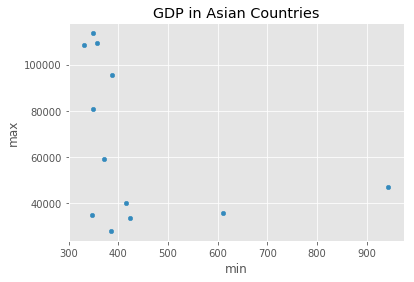

In [36]:
"""Scatter plot of relationship between minimum and maximum GDP per capita among the countries in Asia each year"""
data_asia = pandas.read_csv('data/gapminder_gdp_asia.csv', index_col='country')
data_asia.describe().T.plot(kind='scatter', x='min', y='max', title = "GDP in Asian Countries")

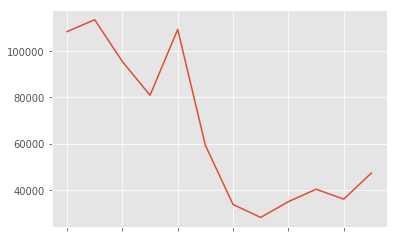

In [53]:
""" Plot the maximum values for GDP in each year"""
#Take a look at the maximum and the max indexes:
data_asia = pandas.read_csv('data/gapminder_gdp_asia.csv', index_col='country')
data_asia.max().plot()
#print(data_asia.idxmax()) #  prints  the country in each year which had the max GDP
# print(data_asia.idxmin()) # prints  the country in each year which had the min GDP

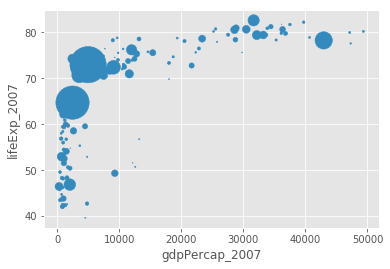

In [54]:
"""Correlation between GDP and life expectancy for 2007, normalizing marker size by population:"""
data_all = pandas.read_csv('data/gapminder_all.csv', index_col='country')
# Scatter defines it to be a scatter plot
# x specifies the x axis data
# Y specifies the y axis data
# s specifies the size of the marker - in this cased based on the population
data_all.plot(kind='scatter', x='gdpPercap_2007', y='lifeExp_2007',
              s=data_all['pop_2007']/1e6)

<Figure size 432x288 with 0 Axes>

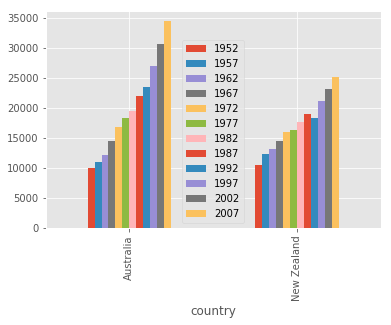

In [57]:
'''Savings plots to file'''
# Method 1 - saves current figure to file, refers to global figure variable, must execute before printing fig to screen.
#plt.savefig('my_figure.png')
# Method 2 - save ref to current figure in local variable, call save fig class on that variable.
fig = plt.gcf() # get current figure
data.plot(kind='bar')
fig.savefig('my_figure.png')